In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from hc_lib.plots.figlib import FigureLibrary
import seaborn
import os

/software/spack-software/2020.05.14/linux-rhel8-ivybridge/gcc-8.4.0/python-3.7.7-zgcjuclie3fiis4ljkrfp4c4j6fkoa62/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
base = '/lustre/cosinga/hcolor/output/'
path = base + 'galhisub_test_tng100B_099S_0A_800R/results/'
hgfile = pkl.load(open(path + 'hisubhaloXgalaxy_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))


In [3]:
flib = FigureLibrary(hgfile, 'pk')

{'color': 'all'}
{'color': 'all'}
{'color': 'all'}
{'color': 'all'}
{'color': 'all'}
{'color': 'all'}
{'color': 'all'}


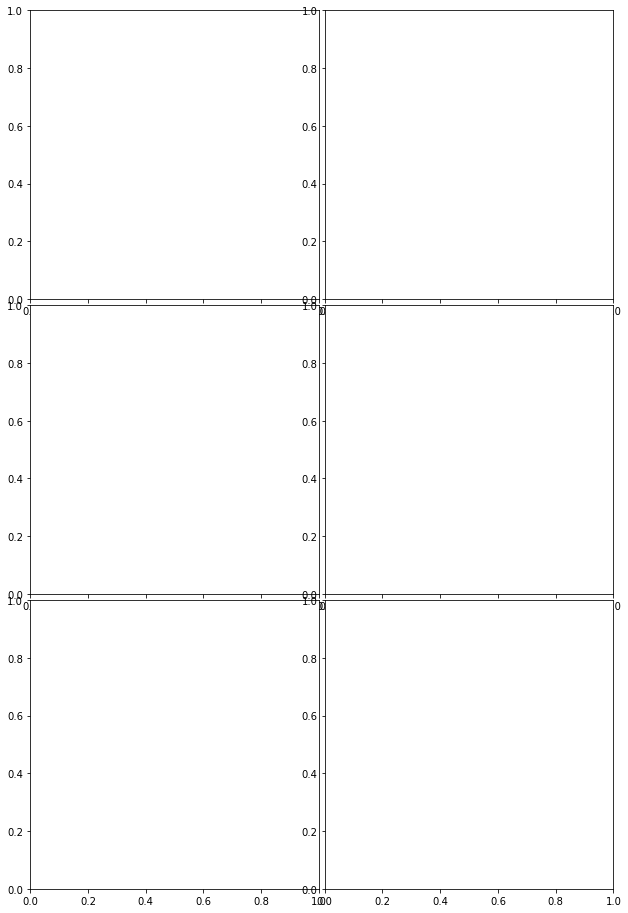

In [4]:
# galaxy bins
thdefs = ['low-threshold', 'mid-threshold', 'high-threshold', 'higher-threshold']
bindefs = ['low-bin', 'mid-bin', 'high-bin', 'higher-bin']

ip = {'gal_res':bindefs, 'HI_res' : 'diemer', 'species':'stmass'}
rmp = {'color': 'all'}
flib.createFigGrid(3,2, panel_length = 4)
figarr = flib.arrangeResults(ip, 'color', ['resolved', 'blue', 'red'], 'space', ['real', 'redshift'], 'gal_res',
                            rmprops = rmp)
fig, panels = flib.getFig()

In [5]:
blue_colors = seaborn.color_palette('Blues', 4)
red_colors = seaborn.color_palette('Reds', 4)
grey_colors = seaborn.color_palette('binary', 4)
# blue_colors = blue_colors[2:]
# red_colors = red_colors[2:]
# grey_colors = grey_colors[2:]
# blue_colors = seaborn.color_palette('winter', 4)


In [6]:
# make bins plots

colors = {}
labels = {}
for bn in bindefs:
    if 'higher' in bn:
        idx = 3
        colors[bn] = {'red':red_colors[idx], 'blue':blue_colors[idx], 'resolved':grey_colors[idx]}
        labels[bn] = '10$^{11}$ $\\leq$ M$_{*}$ / M$_{\\odot}$'

    elif 'low' in bn:
        idx = 0
        colors[bn] = {'red':red_colors[idx], 'blue':blue_colors[idx], 'resolved':grey_colors[idx]}
        labels[bn] = '1.4 x 10$^8$ $\\leq$ M$_{*}$ / M$_{\\odot}$ < 10$^9$'
    elif 'mid' in bn:
        idx = 1
        colors[bn] = {'red':red_colors[idx], 'blue':blue_colors[idx], 'resolved':grey_colors[idx]}
        labels[bn] = '10$^9$ $\\leq$ M$_{*}$ / M$_{\\odot}$ < 10$^{10}$'
    elif 'high' in bn:
        idx = 2
        colors[bn] = {'red':red_colors[idx], 'blue':blue_colors[idx], 'resolved':grey_colors[idx]}
        labels[bn] = '10$^{10}$ $\\leq$ M$_{*}$ / M$_{\\odot}$ < 10$^{11}$'

dim = flib.getDim()
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        
        for bn in bindefs:
            col = figarr[idx][0].props['color'][0]
            
            ip = {'gal_res':bn}
            fkw = {'color':colors[bn][col], 'label':labels[bn], 'alpha':0.9}
            flib.plotFill(idx, ip, fill_kwargs = fkw)
            
    

In [7]:
# axes
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.matchAxisLimits()
flib.logAxis()

# ticks
flib.removeDefaultTickLabels()
flib.changeTickParams()

# labels
colkw = {'fontsize':14}
legkw = {'fontsize':10, 'loc':'upper right'}
flib.colLabels(['Real Space', 'Redshift Space'], txt_kwargs = colkw)
colkw['ha'] = 'left'; colkw['va']= 'bottom'
flib.rowLabels(['All Galaxies', 'Blue Galaxies', 'Red Galaxies'], txt_kwargs = colkw)
flib.addLegend(idx = (2,1), kwargs = legkw)
flib.axisLabel('x')
flib.axisLabel('y', subscript = '\\rm{HI-gal}', txt_kwargs = {'rotation':'vertical'})

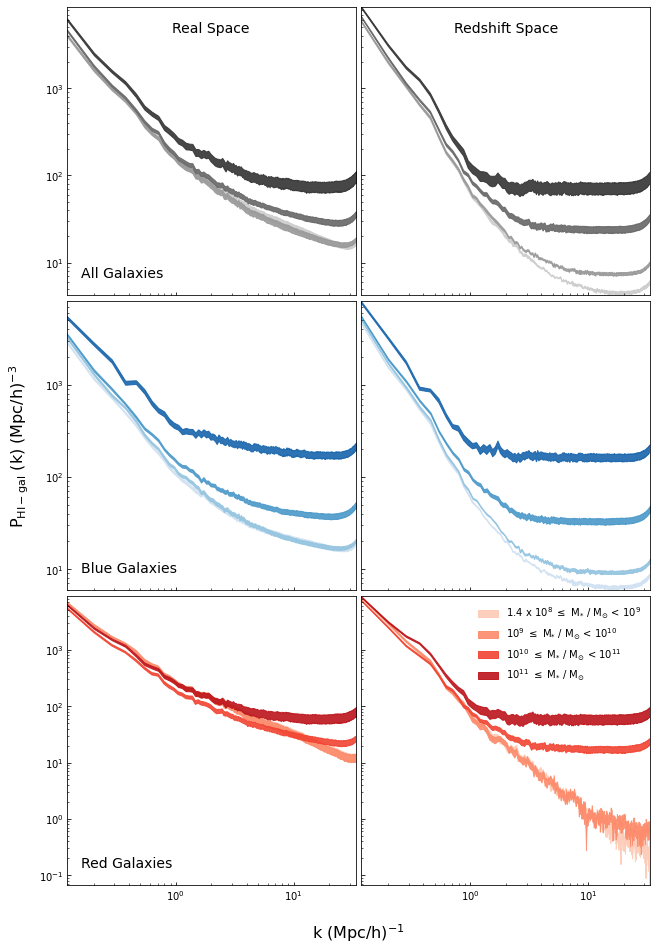

In [8]:
fig

In [12]:
flib.saveFig(os.getcwd()+'/')


{'color': 'all'}
{'color': 'all'}
{'color': 'all'}
{'color': 'all'}
{'color': 'all'}
{'color': 'all'}
{'color': 'all'}
{'color': 'all'}
{'color': 'all'}


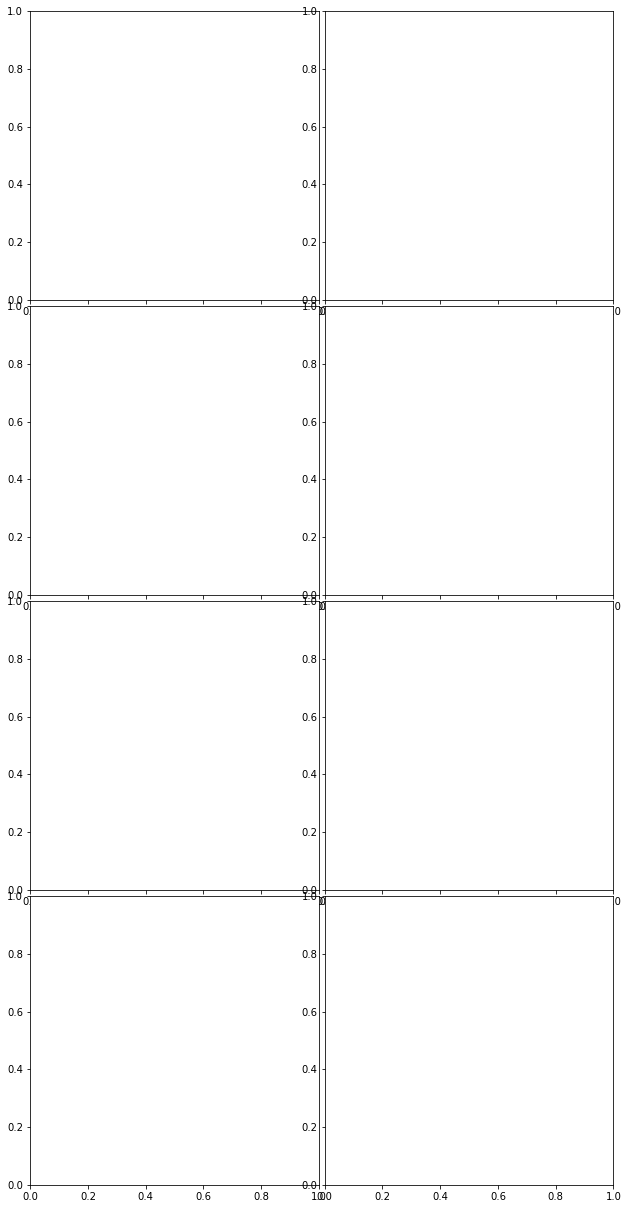

In [13]:
flib = FigureLibrary(hgfile, 'pk')
# galaxy bins
thdefs = ['low-threshold', 'mid-threshold', 'high-threshold', 'higher-threshold']
bindefs = ['low-bin', 'mid-bin', 'high-bin', 'higher-bin']

ip = {'gal_res':bindefs, 'HI_res' : 'diemer', 'species':'stmass'}
rmp = {'color': 'all'}
flib.createFigGrid(4,2, panel_length = 4)
figarr = flib.arrangeResults(ip, 'gal_res', bindefs, 'space', ['real', 'redshift'], 'color',
                            rmprops = rmp)
fig, panels = flib.getFig()

In [14]:
# make bins plots

colors = {'resolved':'gray', 'blue':'blue','red':'red'}
labels = {'resolved':'All Galaxies', 'blue':'Blue Galaxies', 'red':'Red Galaxies'}


dim = flib.getDim()
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        
        for cl in ['resolved','blue','red']:
            
            ip = {'color':cl}
            fkw = {'color':colors[cl], 'label':labels[cl]}
            flib.plotFill(idx, ip, fill_kwargs = fkw)
            
    

In [15]:
# axes
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.matchAxisLimits()
flib.logAxis()

# ticks
flib.removeDefaultTickLabels()
flib.changeTickParams()

# labels
colkw = {'fontsize':14}
legkw = {'fontsize':10, 'loc':'upper right'}
flib.colLabels(['Real Space', 'Redshift Space'], txt_kwargs = colkw)
colkw['ha'] = 'left'; colkw['va']= 'bottom'
rowlabels = ['1.4 x 10$^8$ $\\leq$ M$_{*}$ / M$_{\\odot}$ < 10$^9$',
             '10$^9$ $\\leq$ M$_{*}$ / M$_{\\odot}$ < 10$^{10}$',
             '10$^{10}$ $\\leq$ M$_{*}$ / M$_{\\odot}$ < 10$^{11}$',
             '10$^{11}$ $\\leq$ M$_{*}$ / M$_{\\odot}$']
flib.rowLabels(rowlabels, txt_kwargs = colkw)
flib.addLegend(idx = (3,1), kwargs = legkw)
flib.axisLabel('x')
flib.axisLabel('y', subscript = '\\rm{HI-gal}', txt_kwargs = {'rotation':'vertical'})



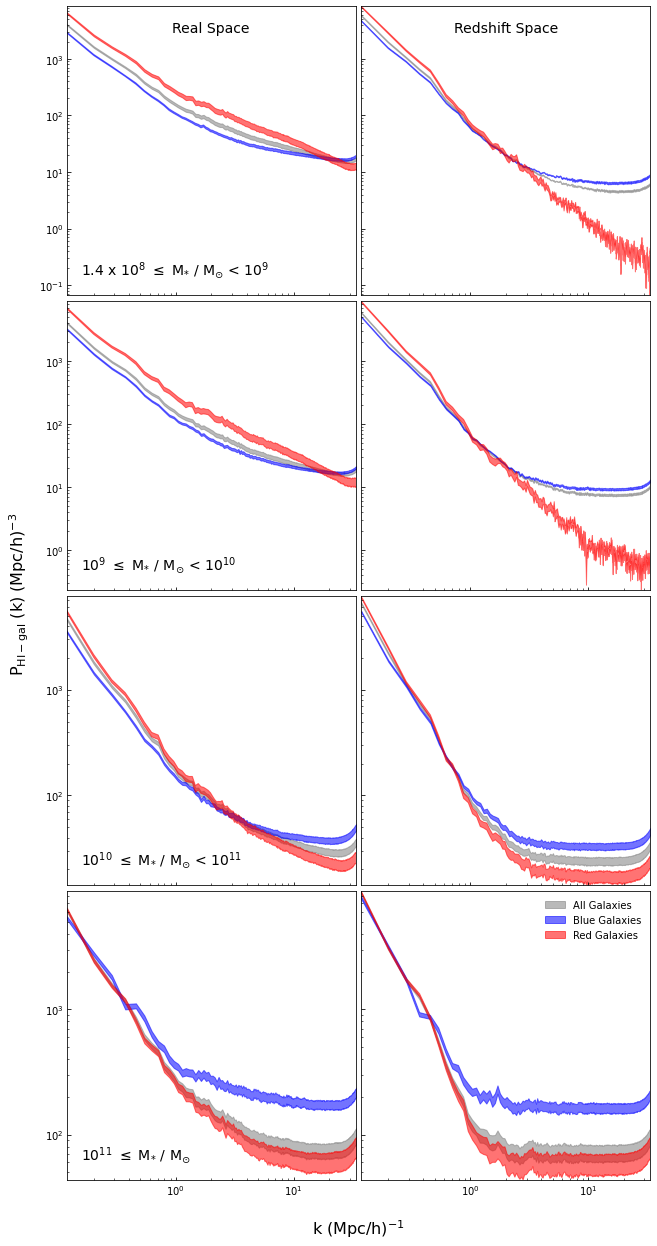

In [16]:
fig

In [17]:
flib.saveFig(os.getcwd() + '/')